In [1]:
from plywood_gallery import ChapterConfig

#ChapterConfig.clean("Image Options")
ChapterConfig.reset_counter()
ChapterConfig.set_chapter_name("Image Options")

Plywood Gallery v0.0.12


/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_23947/5419623.py:17: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  viewer.window.qt_viewer.dockLayerControls.toggleViewAction().trigger()
/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_23947/5419623.py:18: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  viewer.window.qt_viewer.dockLayerList.toggleViewAction().trigger()


(0.0, 1.0, 0.0, 1.0)

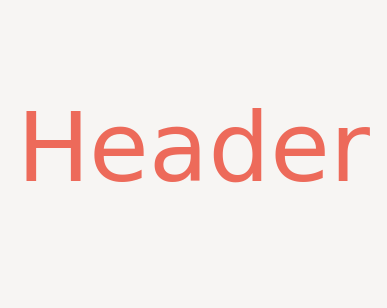

In [2]:
%%capture_png -p Header2.png --celltype Header --style "width:160px"
import matplotlib.pyplot as plt
import napari
from skimage import data

from napari.settings import get_settings

get_settings().application.window_position = (800, 300)
get_settings().application.window_fullscreen = False
get_settings().application.window_statusbar = False
get_settings().application.save_window_state = False


viewer = napari.Viewer()
viewer.theme = "light"
viewer.dims.ndisplay = 3
viewer.window.resize(800, 600)
viewer.window.qt_viewer.dockLayerControls.toggleViewAction().trigger()
viewer.window.qt_viewer.dockLayerList.toggleViewAction().trigger()


def make_screenshot(viewer):
    img = viewer.screenshot(canvas_only=True, flash=False)
    plt.imshow(img)
    plt.axis("off")


# make data
blobs = data.binary_blobs(length=301, volume_fraction=0.1, n_dim=3, seed=42)
blobs = blobs[200:, 200:, :-100]
blobs[:, :, :50] = 1

import matplotlib.pyplot as plt  # NOT

%config InlineBackend.print_figure_kwargs = {'pad_inches':0} # NOT

fix, ax = plt.subplots(figsize=(5, 4), facecolor="#F7F5F3")  # NOT
text_kwargs = dict(ha="center", va="center", fontsize=70, color="#ED6A5A")  # NOT
ax.text(0.5, 0.5, "Header", **text_kwargs)  # NOT
ax.axis("off");  # NOT

In [3]:
plt.rcParams['figure.dpi'] = 70  

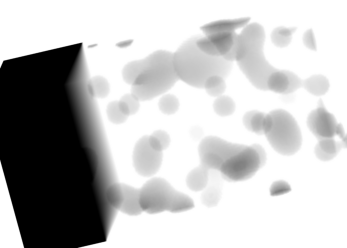

In [4]:
%%capture_png -p FirstView.png --celltype Normal --style "width:160px"
viewer.reset_view()
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_image(blobs, colormap="gray_r")
layer1.rendering = "average"
layer1.gamma = 0.9
viewer.camera.angles = (13, 10, 77)
layer1.opacity = 1
make_screenshot(viewer)
# average # gray_r

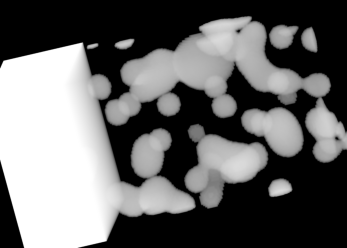

In [5]:
%%capture_png -p Colormapinferno.png --celltype Normal --style "width:160px"
viewer.theme = "dark"
layer1.colormap = "gray"
layer1.gamma = 0.2
make_screenshot(viewer)

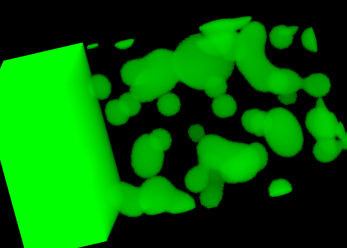

In [6]:
%%capture_png -p ColorGreen.png --celltype Normal --style "width:160px"
layer1.colormap = "green"
layer1.gamma = 0.2
make_screenshot(viewer)



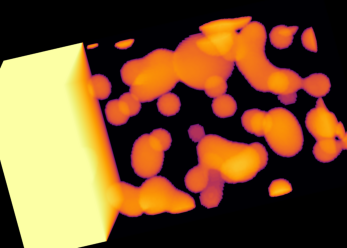

In [7]:
%%capture_png -p Colormapinferno.png --celltype Normal --style "width:160px"
layer1.colormap = "inferno"
layer1.gamma = 0.2
make_screenshot(viewer)

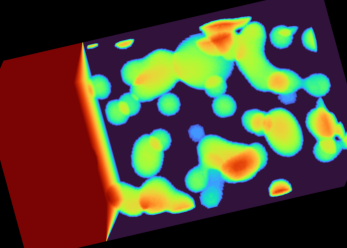

In [8]:
%%capture_png -p Colormapturbocontrast.png --celltype Normal --style "width:160px"
layer1.colormap = "turbo"
layer1.gamma = 0.5
layer1.contrast_limits = [0.0, 0.65]
make_screenshot(viewer)

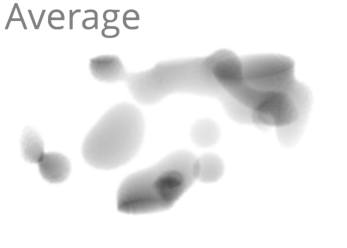

In [9]:
%%capture_png -p BackToBlackGamma1.png --celltype Normal --style "width:160px"
viewer.text_overlay.visible = True
viewer.text_overlay.text = "Average"
viewer.text_overlay.font_size = 40
viewer.layers.clear()
viewer.dims.ndisplay = 3
viewer.theme = "light"
layer1 = viewer.add_image(blobs[50:, :, 100:], colormap="gray_r")
layer1.rendering = "average"
layer1.gamma = 1
# viewer.camera.angles = (-10, 12, 88)
viewer.camera.angles = (165, -50, -153)
layer1.opacity = 1
make_screenshot(viewer)

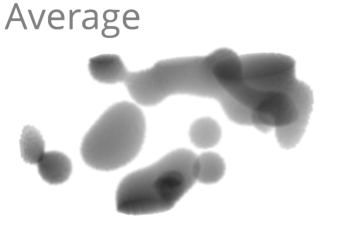

In [10]:
%%capture_png -p BackToBlackGamma0_5.png --celltype Normal --style "width:160px"
layer1.rendering = "average"
layer1.gamma = 0.5
make_screenshot(viewer)

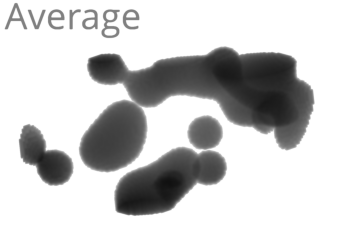

In [11]:
%%capture_png -p BackToBlackGamma0_2.png --celltype Normal --style "width:160px"
layer1.rendering = "average"
layer1.gamma = 0.2
make_screenshot(viewer)

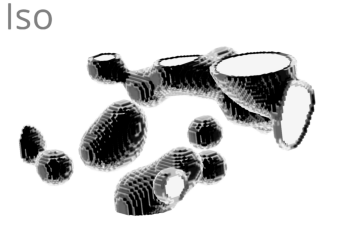

In [12]:
%%capture_png -p iso.png --celltype Normal --style "width:160px"
viewer.text_overlay.text = "Iso"
layer1.rendering = "iso"
layer1.iso_threshold = 0
layer1.gamma = 2
make_screenshot(viewer)

In [13]:
# broken!
# %%capture_png -p iso.png --celltype Normal --style "width:160px"
# viewer.text_overlay.text = "Iso"
# layer1.rendering = "iso"
# layer1.iso_threshold=0
# layer1.gamma = 2
# make_screenshot(viewer)

In [14]:
# broken!
# %%capture_png -p iso2.png --celltype Normal --style "width:160px"
# viewer.text_overlay.text = "Iso"
# layer1.rendering = "iso"
# layer1.iso_threshold=0.5
# layer1.gamma = 2
# make_screenshot(viewer)

In [15]:
# broken!
# %%capture_png -p iso2.png --celltype Normal --style "width:160px"
# viewer.text_overlay.text = "Iso"
# layer1.rendering = "iso"
# layer1.iso_threshold= 0.8
# layer1.gamma = 2
# make_screenshot(viewer)

In [16]:
# broken!
# %%capture_png -p iso2.png --celltype Normal --style "width:160px"
# viewer.text_overlay.text = "Iso"
# layer1.rendering = "iso"
# layer1.iso_threshold= 0.8
# layer1.gamma = 1
# make_screenshot(viewer)

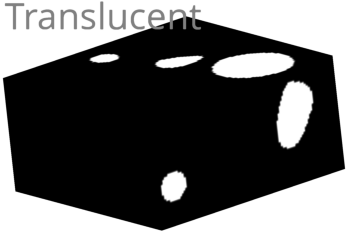

In [17]:
%%capture_png -p trans.png --celltype Normal --style "width:160px"
viewer.text_overlay.text = "Translucent"  # see the surface
layer1.rendering = "translucent"
layer1.colormap = "gray"
make_screenshot(viewer)

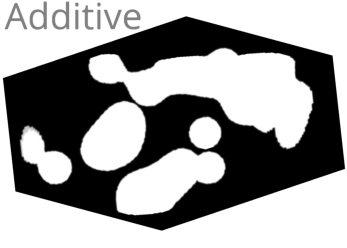

In [18]:
%%capture_png -p additive.png --celltype Normal --style "width:160px"
viewer.text_overlay.text = "Additive"
layer1.rendering = "additive"
layer1.colormap = "gray"
make_screenshot(viewer)

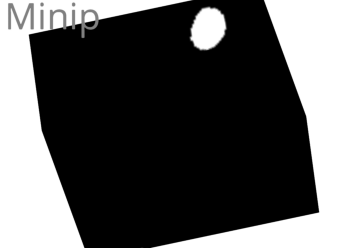

In [19]:
%%capture_png -p Minip.png --celltype Normal --style "width:160px"
viewer.text_overlay.text = "Minip"  # find holes
viewer.camera.angles = (-70, -54, 80)
layer1.rendering = "minip"
layer1.colormap = "gray"
make_screenshot(viewer)

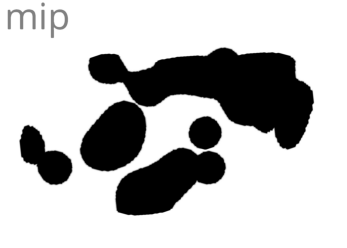

In [20]:
%%capture_png -p attenuated_mip_0_5.png --celltype Normal --style "width:160px"
viewer.text_overlay.text = "mip"
layer1.rendering = "attenuated_mip"
layer1.attenuation = 0.5
layer1.gamma = 2
layer1.colormap = "gray_r"
viewer.camera.angles = (165, -50, -153)
make_screenshot(viewer)

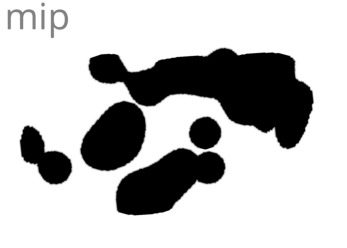

In [21]:
%%capture_png -p attenuated_mip_0_2.png --celltype Normal --style "width:160px"
layer1.rendering = "attenuated_mip"
layer1.attenuation = 0.2
layer1.gamma = 2
make_screenshot(viewer)

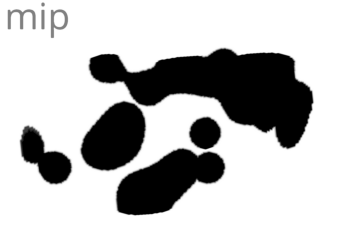

In [22]:
%%capture_png -p attenuated_mip_0.png --celltype Normal --style "width:160px"
layer1.rendering = "attenuated_mip"
layer1.attenuation = 0
layer1.gamma = 2
make_screenshot(viewer)

/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_23947/261592039.py:1: DeprecationWarning: Interpolation setting is deprecated since 0.4.17. Please use interpolation2d or interpolation3d
  layer1.interpolation = "linear"


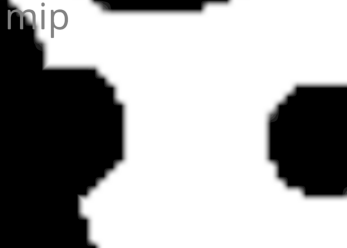

In [23]:
%%capture_png -p Linear.png --celltype Normal --style "width:160px"
layer1.interpolation = "linear"
layer1.attenuation = 0
viewer.camera.angles = (90, 90, 0)
layer1.gamma = 2
viewer.camera.zoom = 20
make_screenshot(viewer)

/var/folders/c3/3bzrl3qx043bknt1ycn3fcym0000gn/T/ipykernel_23947/2455166519.py:1: DeprecationWarning: Interpolation setting is deprecated since 0.4.17. Please use interpolation2d or interpolation3d
  layer1.interpolation = "nearest"


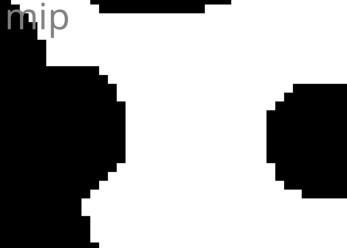

In [24]:
%%capture_png -p Nearest.png --celltype Normal --style "width:160px"
layer1.interpolation = "nearest"
layer1.attenuation = 0
viewer.camera.angles = (90, 90, 0)
layer1.gamma = 2
viewer.camera.zoom = 20
make_screenshot(viewer)

In [25]:
viewer.text_overlay.visible = False

# ChapterConfig.clean("Image Options")